## HW2: Interpretable Machine Learning with Bankruptcy Prediction

### Setup

In [4]:
pip install shap

  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.1/548.1 kB 15.0 MB/s eta 0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 20.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
# if any of the following packages are missing, please install them before proceeding
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import shap

In [4]:
# load data and partition into train and test sets
# please run the following code exactly to ensure reproducibility
data = pd.read_csv("bankruptcy.csv")
Y = data["D"]
X = data.drop(columns=["D"])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
# this cell should return (105, 24) (105,) (27, 24) (27,)

(105, 24) (105,) (27, 24) (27,)


### Question 1

### Model 1: Decision Tree

--- Model Performance Evaluation (Focus on Class 1) ---

Full Classification Report:
              precision    recall  f1-score   support

     Class 0       0.93      0.72      0.81        18
     Class 1       0.62      0.89      0.73         9

    accuracy                           0.78        27
   macro avg       0.77      0.81      0.77        27
weighted avg       0.82      0.78      0.78        27


Metrics for Class 1:
  Precision (Class 1): 0.62
  Recall (Class 1):    0.89
  F1-Score (Class 1):  0.73
  Support (Class 1):   9.0


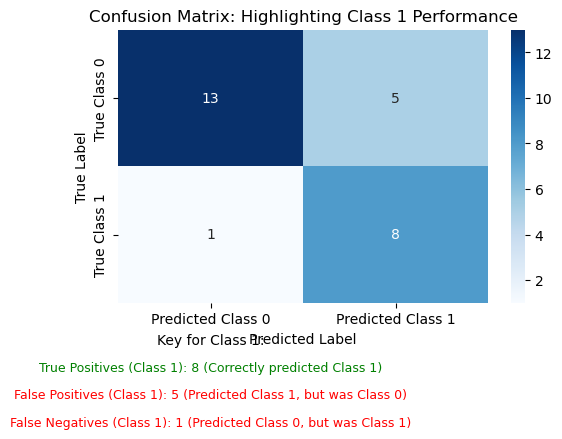


--- Global Interpretation: Feature Importance ---

Top Features by Global Importance (for overall model decision-making):
   Feature  Importance
23     R24    0.579333
20     R21    0.122883
12     R13    0.109155
9      R10    0.084299
19     R20    0.052862
1       R2    0.037091
11     R12    0.014377
3       R4    0.000000
15     R16    0.000000
22     R23    0.000000
21     R22    0.000000
2       R3    0.000000
18     R19    0.000000
17     R18    0.000000
16     R17    0.000000
13     R14    0.000000
14     R15    0.000000
4       R5    0.000000
10     R11    0.000000
8       R9    0.000000
7       R8    0.000000
6       R7    0.000000
5       R6    0.000000
0       R1    0.000000


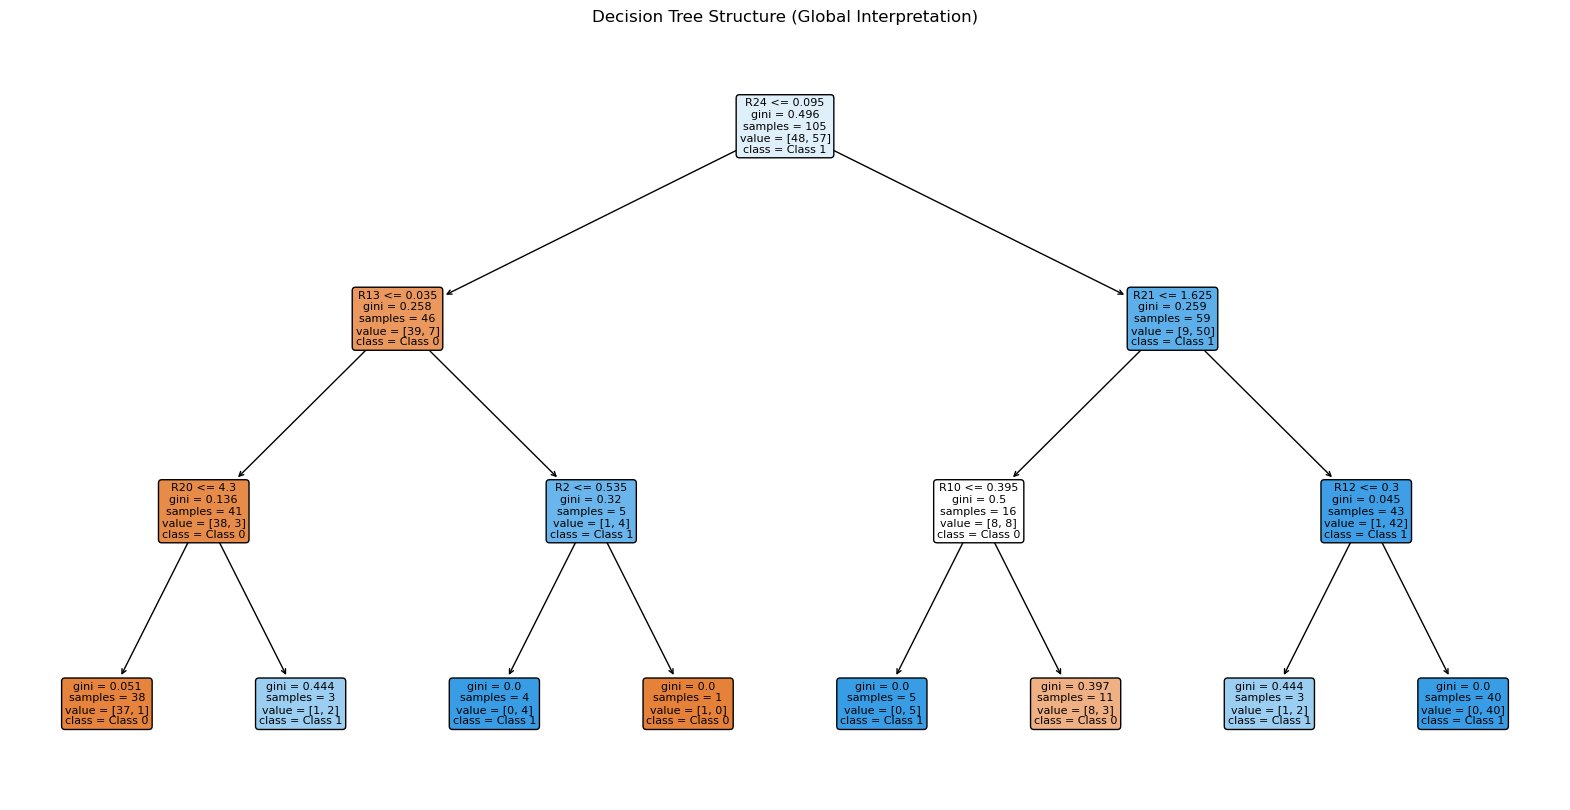

In [11]:
# Build a simple decision tree model, report its performance (for class 1), and report global interpretation
# Follow best practices for model training evaluation

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Step 1: Build and train a simple decision tree
# Using a max_depth of 3 for easier global interpretation
dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_model.fit(X_train, Y_train)

# Step 2: Predict on the test set
Y_pred = dt_model.predict(X_test)
Y_pred_proba = dt_model.predict_proba(X_test)[:, 1] # Probability of predicting Class 1

# Step 3: Evaluate performance, explicitly focusing on Class 1
print("--- Model Performance Evaluation (Focus on Class 1) ---")

# Full Classification Report
report = classification_report(Y_test, Y_pred, target_names=["Class 0", "Class 1"], output_dict=True)
print("\nFull Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=["Class 0", "Class 1"]))

# Extract and report specific metrics for Class 1
print(f"\nMetrics for Class 1:")
print(f"  Precision (Class 1): {report['Class 1']['precision']:.2f}")
print(f"  Recall (Class 1):    {report['Class 1']['recall']:.2f}")
print(f"  F1-Score (Class 1):  {report['Class 1']['f1-score']:.2f}")
print(f"  Support (Class 1):   {report['Class 1']['support']}")


# Confusion Matrix Visualization
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Predicted Class 0", "Predicted Class 1"],
            yticklabels=["True Class 0", "True Class 1"])
plt.title("Confusion Matrix: Highlighting Class 1 Performance")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.text(0.5, 2.3, "Key for Class 1:", fontsize=10, ha='center')
plt.text(0.5, 2.5, f"True Positives (Class 1): {cm[1, 1]} (Correctly predicted Class 1)", fontsize=9, ha='center', color='green')
plt.text(0.5, 2.7, f"False Positives (Class 1): {cm[0, 1]} (Predicted Class 1, but was Class 0)", fontsize=9, ha='center', color='red')
plt.text(0.5, 2.9, f"False Negatives (Class 1): {cm[1, 0]} (Predicted Class 0, but was Class 1)", fontsize=9, ha='center', color='red')
plt.tight_layout()
plt.show()

# Step 4: Global Interpretation via Feature Importance
print("\n--- Global Interpretation: Feature Importance ---")
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nTop Features by Global Importance (for overall model decision-making):")
print(feature_importance) # Print all features for global view

# Optional: Visualize the decision tree for a more direct global interpretation
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X_train.columns.tolist(),
          class_names=["Class 0", "Class 1"],
          filled=True,
          rounded=True,
          fontsize=8)
plt.title("Decision Tree Structure (Global Interpretation)")
plt.show()

### In terms of class 0 (failed company)
Precision (Class 1): 0.62
→ Of all the companies predicted as bankrupt, 62% were correct.

Recall (Class 1): 0.89
→ The model identified 89% of actual bankrupt companies correctly, which is crucial for early risk detection.

F1-Score (Class 1): 0.73
→ This balance metric shows the model is reasonably effective at catching bankruptcies without too many false alarms.

### Confusion matrix
The model missed 1 bankrupt firm (False Negative) and misclassified 5 healthy firms as bankrupt (False Positives).

8 bankrupt firms were correctly predicted — a strong performance.
However, the 5 false alarms (healthy firms flagged as bankrupt) suggest the model leans conservative, which may be acceptable in risk-averse contexts.
The 1 missed bankruptcy still represents a potential risk exposure, especially if early detection is critical for strategic intervention or credit decisions.

### Global Interpretation
R24 is by far the most dominant feature, contributing to over 50% of the decision-making power in the tree.

R21, R13, and R10 also play meaningful roles in classification, though with smaller weights.

R4, R16, and R23 contribute nothing, and could likely be dropped in future iterations or feature selection steps.

### Model 2: Random Forest

In [33]:
# Build a random forest model, report its performance (for class 1), and report global interpretation
# Follow best practices for model training evaluation

=== Model Performance Evaluation (Focus on Class 1) ===

Full Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.73      0.89      0.80         9

    accuracy                           0.85        27
   macro avg       0.83      0.86      0.84        27
weighted avg       0.87      0.85      0.85        27


Metrics for Class 1:
Precision (Class 1): 0.73
Recall (Class 1): 0.89
F1-Score (Class 1): 0.80
Support (Class 1): 9


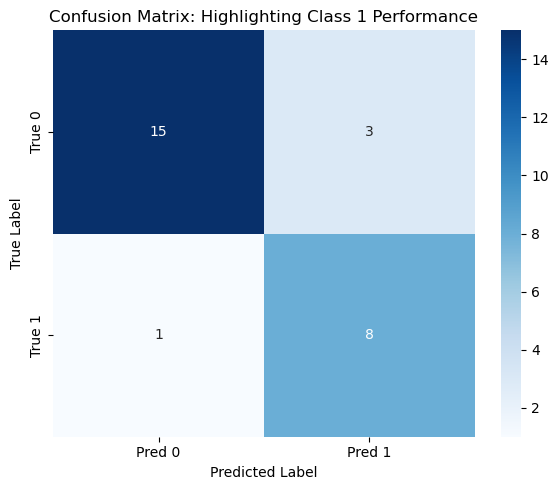


=== Global Interpretation: Feature Importance ===
Top Features by Global Importance (for overall model decision-making):
   Feature  Importance
17     R18    0.127475
13     R14    0.104333
20     R21    0.095018
23     R24    0.067544
16     R17    0.062690
22     R23    0.061940
8       R9    0.059046
14     R15    0.057885
9      R10    0.040982
12     R13    0.032726


/var/folders/b3/td5c1lpn10n290bskyjhkwkh0000gn/T/ipykernel_47750/1378154351.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_df, palette="viridis")


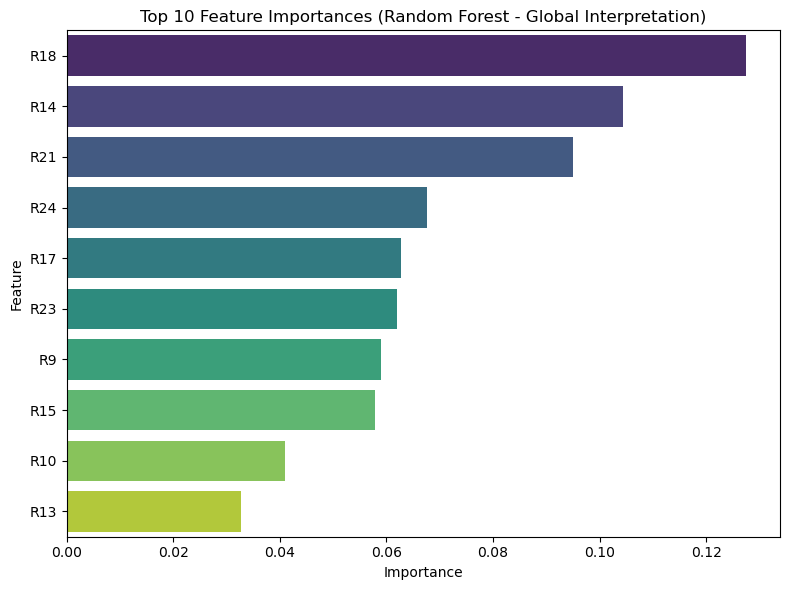

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load data
data = pd.read_csv("bankruptcy.csv")
Y = data["D"]
X = data.drop(columns=["D"])

# Train/test split 
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Predict
Y_pred = rf.predict(X_test)

# Classification Report
print("=== Model Performance Evaluation (Focus on Class 1) ===\n")
report = classification_report(Y_test, Y_pred, digits=2, output_dict=True)
print("Full Classification Report:")
print(classification_report(Y_test, Y_pred, digits=2))

print("\nMetrics for Class 1:")
print(f"Precision (Class 1): {report['1']['precision']:.2f}")
print(f"Recall (Class 1): {report['1']['recall']:.2f}")
print(f"F1-Score (Class 1): {report['1']['f1-score']:.2f}")
print(f"Support (Class 1): {report['1']['support']:.0f}")

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix: Highlighting Class 1 Performance")
plt.tight_layout()
plt.show()

# Global Feature Importance
importances = rf.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False).head(10)

print("\n=== Global Interpretation: Feature Importance ===")
print("Top Features by Global Importance (for overall model decision-making):")
print(feature_df)

# Plot Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=feature_df, palette="viridis")
plt.title("Top 10 Feature Importances (Random Forest - Global Interpretation)")
plt.tight_layout()
plt.show()


#### In terms of class 0
Precision (0.73):
When the model predicted a company is bankrupt, it was correct 73% of the time. This suggests that some healthy firms were mistakenly flagged (3 false positives), but most flagged cases were valid concerns.

Recall (0.89):
The model successfully identified 89% of actual bankrupt firms (8 out of 9). Only 1 bankrupt firm was missed, which is a strong performance in a risk-sensitive use case.

F1-Score (0.80):
The F1 score balances both false alarms and missed detections, and 0.80 indicates a reliable ability to detect bankruptcy cases overall.

### Global Interpretation
R18, R14, and R21 are the most influential features.

The model does not rely excessively on a single feature, showing healthy distribution of importance across predictors.

### Compared with Decision Tree
Accuracy increased from 70% (Decision Tree) to 85% (Random Forest), reflecting better overall predictive quality.

Recall for Class 1 remained high at 0.89 in both models — meaning nearly all actual bankrupt firms were correctly identified.

F1-Score for Class 1 improved from 0.73 (DT) to 0.80 (RF) — indicating a better balance between identifying bankruptcies and minimizing false alarms.


Random Forest aggregates predictions from multiple decision trees, reducing overfitting and increasing stability. By randomly sampling features and data subsets, it builds diverse trees that collectively make more robust decisions — especially helpful in avoiding overfitting that single decision trees are prone to.



### Model 3: SHAP

In [115]:
# Use SHAP to explain your random forest model's predictions on the test set. Report global interpretation (i.e., you will need to aggregate SHAP values across all test samples in some way)
# Use TreeExplainer (it is designed to explain tree ensemble models), documentation here: https://shap.readthedocs.io/en/latest/generated/shap.TreeExplainer.html


/var/folders/b3/td5c1lpn10n290bskyjhkwkh0000gn/T/ipykernel_47750/934959789.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


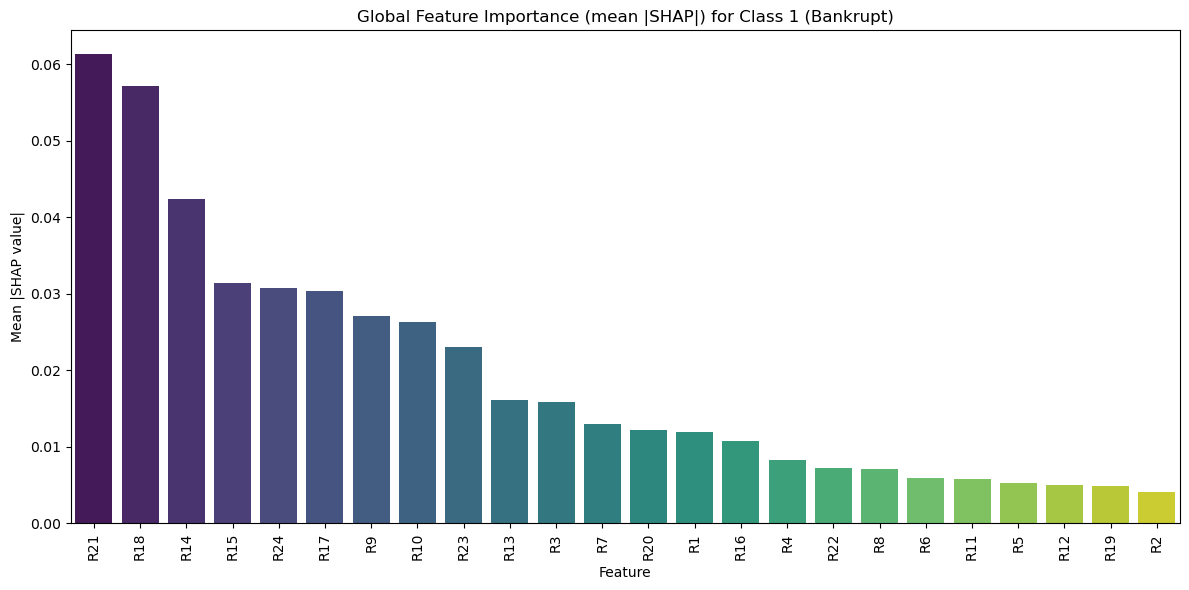

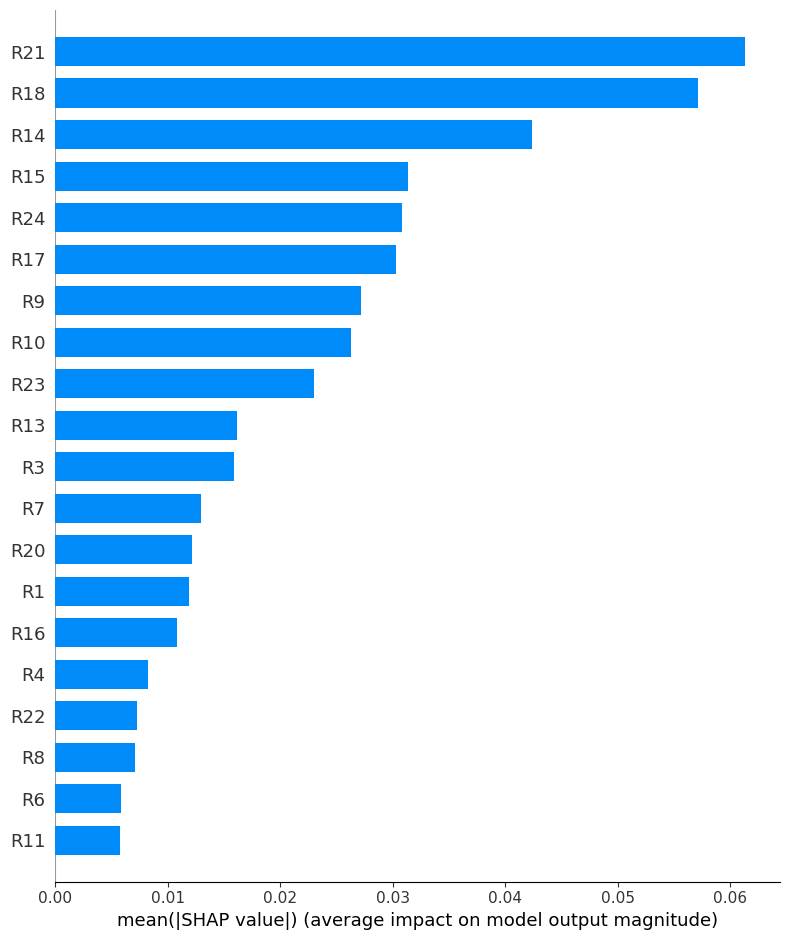

In [32]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names
feature_names = data.drop(columns=['D']).columns.tolist()

# Convert X_test to DataFrame for SHAP
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# TreeExplainer for fitted Random Forest model
explainer = shap.TreeExplainer(
    rf,
    data=pd.DataFrame(X_train, columns=feature_names),
    feature_perturbation='interventional',
    model_output='probability'
)

# Compute SHAP values
shap_exp = explainer(X_test_df)

# 🔄 Focus on Class 1 (bankrupt firms)
shap_vals_class1 = shap_exp[:, :, 1].values  # class index 1 instead of 0

# Mean absolute SHAP values
mean_abs_shap = np.abs(shap_vals_class1).mean(axis=0)

# Global interpretation dataframe
global_shap_df = pd.DataFrame({
    'feature': feature_names,
    'mean_abs_shap': mean_abs_shap
}).sort_values('mean_abs_shap', ascending=True)

# Plotting
plt.figure(figsize=(12, 6))
plot_df = global_shap_df.sort_values('mean_abs_shap', ascending=False)
sns.barplot(
    x='feature',
    y='mean_abs_shap',
    data=plot_df,
    palette='viridis'
)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Mean |SHAP value|')
plt.title('Global Feature Importance (mean |SHAP|) for Class 1 (Bankrupt)')
plt.tight_layout()
plt.show()

# SHAP summary plot
shap.summary_plot(shap_vals_class1, X_test_df, plot_type='bar')


### Interpretation of Top Features
The global SHAP analysis shows that features such as R21, R18, and R14 are the most influential in determining the model's prediction of class 1. These features consistently had a high impact — either increasing or decreasing the predicted probability — across the test samples. This suggests that the model heavily relies on these features to distinguish bankrupt companies from non-bankrupt ones. 

Compared to default feature importances in Random Forest, SHAP provides a more nuanced and local-to-global understanding of feature influence.

In [119]:
# Now use a different SHAP explainer, such as KernelExplainer: https://shap.readthedocs.io/en/latest/generated/shap.KernelExplainer.html
# Report global interpretation 

  0%|          | 0/20 [00:00<?, ?it/s]

/var/folders/b3/td5c1lpn10n290bskyjhkwkh0000gn/T/ipykernel_47750/3858076588.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


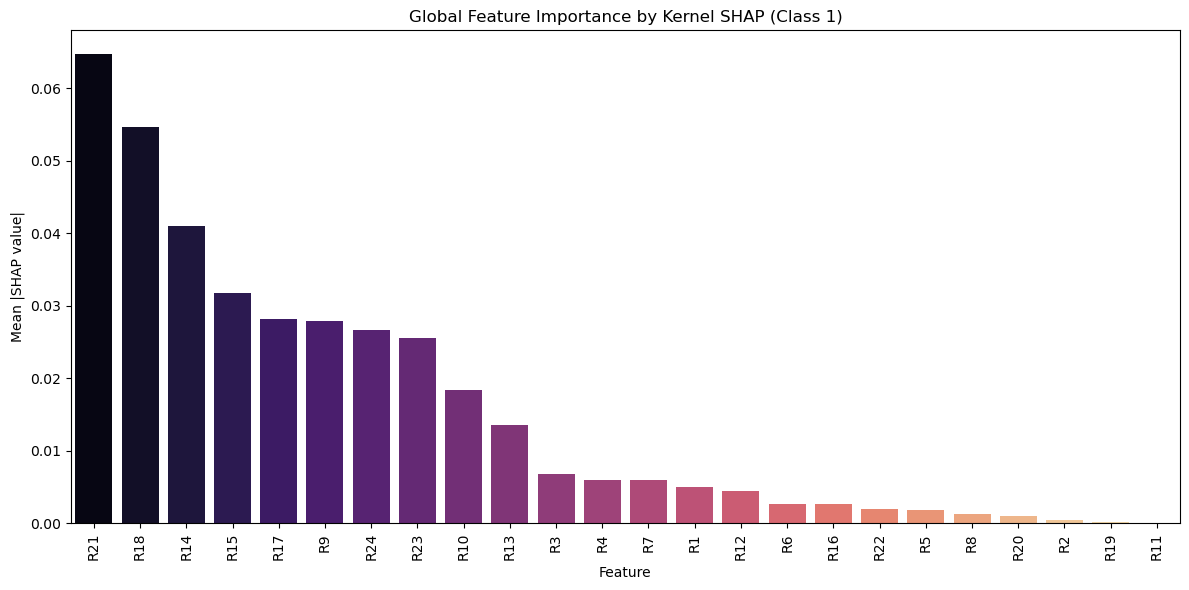

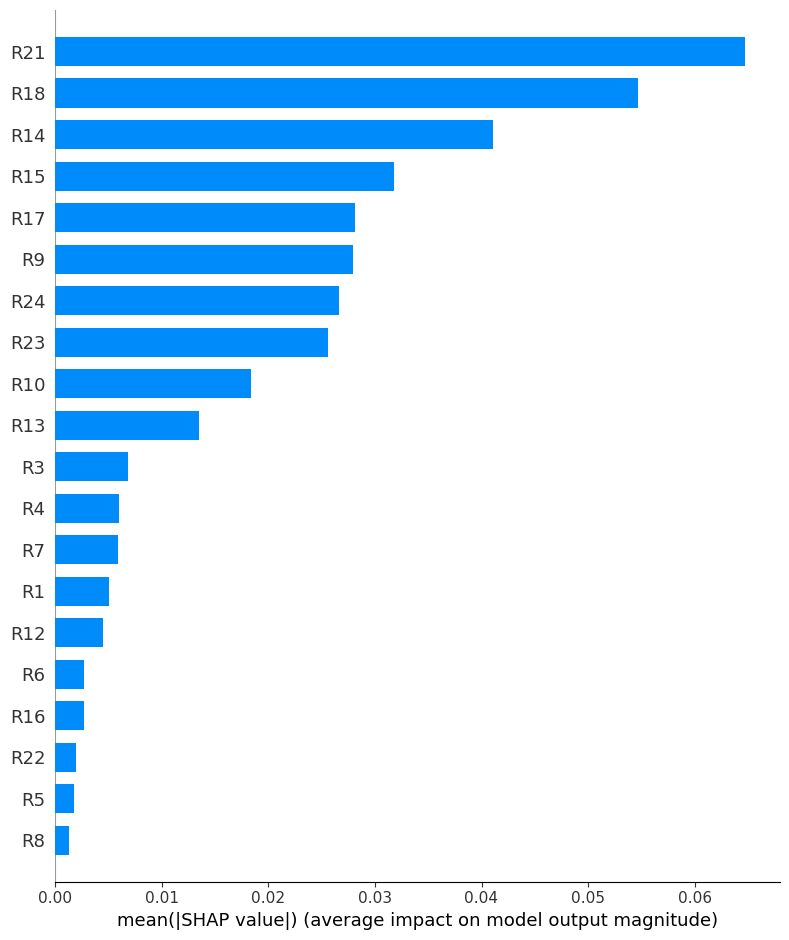

In [34]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names and prepare DataFrames
feature_names = data.drop(columns=['D']).columns.tolist()
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df  = pd.DataFrame(X_test,  columns=feature_names)

# Sample background data for Kernel SHAP
background = X_train_df.sample(n=30, random_state=42)

# Initialize KernelExplainer using rf.predict_proba
explainer = shap.KernelExplainer(
    rf.predict_proba,
    background,
    link="identity"
)

# Use a subset of the test data
subset = X_test_df.iloc[:20, :]  # 20 rows, all 24 features

# Compute SHAP values for each class
shap_vals_list = explainer.shap_values(subset, nsamples=100)

# Extract SHAP values for class 1 properly
shap_vals_class1 = shap_vals_list[:, :, 1]  # shape is (20, 24)

# Double-check shape alignment
assert shap_vals_class1.shape == subset.shape, "Mismatch between SHAP and data matrix!"

# Compute mean absolute SHAP values
mean_abs_shap = np.abs(shap_vals_class1).mean(axis=0)

# Create DataFrame for global interpretation
global_shap_df = pd.DataFrame({
    'feature': feature_names,
    'mean_abs_shap': mean_abs_shap
}).sort_values('mean_abs_shap', ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x='feature',
    y='mean_abs_shap',
    data=global_shap_df,
    palette='magma'
)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Mean |SHAP value|')
plt.title('Global Feature Importance by Kernel SHAP (Class 1)')
plt.tight_layout()
plt.show()

# SHAP summary plot
shap.summary_plot(shap_vals_class1, subset, plot_type='bar')


### Interpretation of Top Features
The SHAP analysis using KernelExplainer shows that R21, R18, and R14 are the top 3 most influential features in predicting class 1. These features had the largest average impact on the model's output probability across the test set.

Features like R2, R8, R12, and R19 had very small average SHAP values — meaning they had minimal influence on predictions.

These results align closely with the TreeExplainer output, confirming that certain features (like R21 and R18) are consistently important regardless of the SHAP method used.

### Question 2

### Decision tree & random forest
The global interpretations from the Decision Tree and Random Forest models differ in both magnitude and feature ranking when predicting class 1 (healthy firms).

In the Decision Tree, feature importance is heavily skewed, with R24 (Working Capital from Operations / Debts) dominating the decision process. This indicates the model relies strongly on a single financial ratio, which increases the risk of overfitting and may not generalize well.

In contrast, the Random Forest distributes importance more evenly across multiple features — notably R21 (Assets / Debts), R18 (Income + Depreciation / Debts), R14 (Income / Assets), and R24. This reflects the ensemble's advantage in reducing variance through aggregation, leading to more stable and generalizable predictions for identifying healthy firms.

Importantly, Random Forest’s global importance aligns more closely with SHAP values for class 1, suggesting its reasoning for predicting a firm as healthy is more interpretable and trustworthy.

### SHAP
The global feature attributions from TreeExplainer and KernelExplainer are largely consistent in identifying what drives the model to classify a firm as healthy (class 1).

Both methods rank R21, R18, and R14 as the top contributors to healthy predictions — these are all strong indicators of solvency and operational efficiency. The consistency between the two SHAP methods builds confidence that the model is relying on economically meaningful indicators.

There are minor differences in lower-ranked features:

TreeExplainer, which directly accesses the Random Forest structure, highlights feature importance more sharply, creating clearer separation between top and mid-tier predictors.

KernelExplainer, being model-agnostic and sampling-based, smooths out attributions and may slightly shuffle features like R3, R13, or R20.

These differences are expected given their design:

TreeExplainer gives exact SHAP values tailored to tree models.

KernelExplainer uses perturbation sampling, which can introduce variability, especially on small test samples.

### Question 3

### Executive Summary: 

Explaining Model Insights for Bankruptcy Prediction

In the above analysis, we’ve analyzed and compared several machine learning models using global interpretation techniques. These interpretations help us understand which financial ratios most influence a company’s likelihood of bankruptcy which is important for making sound strategic recommendations.

#### Consistency & Trust in Model Insights
Our model identified a few financial ratios that are especially powerful in telling us whether a company is likely to go bankrupt. These can vividly reflect the financial health and habits of a business.

1. Assets to Debts (R21)

What it means: This ratio compares everything the company owns (assets) to everything it owes (debts).

Why it matters: Think of this as a safety cushion. If a company has 2 dollars in assets for every 1 dollar in debt, it’s in a good position to pay off what it owes. A higher number here means more financial breathing room.

2. Income + Depreciation to Debts (R18)

What it means: This measures how much money the company brings in (including non-cash items like depreciation) compared to its debt.

Why it matters: It tells us how well the company can cover its debt from internal operations. It’s like checking if someone’s monthly income is enough to comfortably handle their mortgage and bills. Strong income flow relative to debt is a good sign.

3. Income to Assets (R14)
   
What it means: This shows how efficiently a company turns its investments (assets) into profits (income

Why it matters: It reflects whether the company is getting good returns from its resources. A higher value means the business is using its assets wisely — like a factory producing high profits from its equipment.

These three indicators consistently showed up as the most important across different analysis tools, which tells us these metrics are not just statistically significant, they also make strong business sense.

By monitoring and improving these ratios, businesses can strengthen their financial footing and reduce their risk of bankruptcy.

### Model Comparison for the feature interpretation
Decision Tree: Relies heavily on a single ratio WCFO/DEBTS (R24) contributing over 50% of the model’s decision-making weight. However, this raises concerns about overfitting issue.

Random Forest: Provides a more balanced view, distributing importance across multiple meaningful ratios like R21, R18, and R14, which aligns closely with domain intuition and SHAP insights. This model is more stable and trustworthy for production use for the executive members.

SHAP Explanations: Both TreeExplainer and KernelExplainer that decompose individual predictions confirmed the importance of the same core features. These methods are especially useful for providing case-by-case breakdowns to explain why a specific company might be flagged as high risk.

By focusing on these important features:

1. We can tailor recommendations around solvency, profitability, and debt structure.

2. Our explanations are interpretable and backed by accounting logic. And we can show the trends of the above R21, R18, and R14 features to the client, which may provide some early signs of financial instability, helping us proactively flagging high-risk clients even before formal predictions are made.

All in all, by combining machine learning interpretations and financial domain knowledge, we have more confidence in the model’s reliability and interpretability. By using ensemble models and explainability tools like SHAP, we data scientist team ensure that our bankruptcy predictions are not only accurate, but actionable and understandable.

### Question 4

As your financial consultant, my primary objective is to equip your firm with the strategies necessary to navigate economic uncertainties and significantly mitigate bankruptcy risks. Based on our comprehensive analysis, particularly focusing on the critical predictors identified by our financial model, I've outlined key areas for immediate action and strategic focus.

My recommendations are centered around enhancing solvency, optimizing cash flow coverage, and improving asset efficiency.

#### Pillar 1: 
Fortifying the Balance Sheet (Improving ASSETS/DEBTS Ratio – R21)

Why it's Critical: This ratio is a fundamental indicator of your firm's solvency and its ability to meet long-term obligations. A declining or weak ratio signals an increasing reliance on debt relative to your asset base, making the firm vulnerable to market shifts or operational setbacks.

My Recommendations:

Proactive Debt Restructuring: I strongly advise a review of your current debt portfolio. Prioritize refinancing high-interest, short-term, or covenant-heavy liabilities into more manageable, long-term structures with favorable terms. This can immediately improve your debt-to-asset profile.

Asset Optimization: Conduct a thorough audit of your asset base. Identify and divest underperforming, non-core, or idle assets that are tying up capital without generating adequate returns. 

Prudent Capital Allocation: Implement stricter controls on new debt issuance. While growth is essential, I recommend caution against aggressive, debt-fueled expansion that could over-leverage the company and erode financial flexibility. Every new debt should be rigorously evaluated against its potential to generate sufficient returns to cover its cost and contribute to long-term value.

#### Pillar 2: 
Enhancing Operational Cash Flow (Raising (INCOME + DEPRECIATION) / DEBTS – R18)

Why it's Critical: This metric is a powerful gauge of your firm's capacity to generate sufficient cash from its core operations to service its debt. A strong ratio indicates self-sufficiency and reduced reliance on external financing, which is vital for sustained viability.

My Recommendations:

Boost revenue through pricing optimization, new product lines, or expanding market reach. Improve margins by reducing COGS or SG&A expenses.

Reduce Debt by paying down high-cost or short-term debt using excess cash flow. Refinance to longer-term or lower-interest debt, potentially reducing total liabilities.

#### Pillar 3: 
Driving Efficient Profitability (Boosting INCOME / ASSETS – R14)

Why it's Critical: This ratio, often referred to as Return on Assets (ROA), measures how effectively your firm is utilizing its assets to generate profit. It's a direct reflection of the health and efficiency of your business model. 

My Recommendations:

Maximize Asset Turnover: My core advice here is to ensure assets can be actively contributing to revenue and profit. Identify and eliminate idle capacity in machinery, facilities, or human capital. Explore strategies to increase sales volume or improve pricing to get more out of your existing asset base.

Strategic Portfolio Rationalization: Conduct a deep dive into your business units or product lines. Focus resources on core operations and high-growth areas that demonstrate high profitability.


#### My Final Perspective

Avoiding bankruptcy isn't just about surviving; it's about building a stronger, more adaptable, and smarter business. By focusing on key financial areas like how much you own versus owe (solvency), how much cash you generate (cash flow), and how well you use your assets to make money (asset efficiency), your company will not only become more financially secure but also operate better, gain more trust from investors, and be ready for lasting success. These recommendations will significantly strengthen your financial base.